### What are the predominant tones used in films and how do they vary across the most populars genres?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 
import ast

sys.path.append("../")
from utils.methods import conv_to_dict

df = pd.read_csv("../../data/final_data_complete.csv")
df.head()


,WikiID,FreebaseID,Name,ReleaseDate,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,...,ActorAge,ActorGender,ActorBirthDate,ActorGenderFlag,merge_title,movieId,title,mean_ratings,std_dev_ratings,count_ratings
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",['English Language'],['United States of America'],...,"[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, 37....","['F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', ...","[Timestamp('1958-08-26 00:00:00'), Timestamp('...","[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",ghosts of mars,4735.0,Ghosts of Mars (2001),2.427083,1.087064,144.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English Language'],['United States of America'],...,"[37.78852253927453, 43.0, 37.78852253927453, 3...","['M', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F', ...","[NaT, Timestamp('1956-12-19 00:00:00'), NaT, N...","[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]",getting away with murder: the jonbenét ramsey ...,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",['Norwegian Language'],['Norway'],...,"[33.0, 28.0, 40.0, 30.0]","['M', 'F', 'M', 'F']","[Timestamp('1954-10-05 00:00:00'), Timestamp('...","[0, 1, 0, 1]",brun bitter,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",['English Language'],['United Kingdom'],...,"[32.0, 26.0]","['M', 'F']","[Timestamp('1954-05-08 00:00:00'), Timestamp('...","[0, 1]",white of the eye,90015.0,White of the Eye (1987),2.250000,2.474874,2.0
4,261236,/m/01mrr1,A Woman in Flames,1983,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",['German Language'],['Germany'],...,"[32.0, 32.0, 35.0]","['F', 'M', 'M']","[Timestamp('1950-06-20 00:00:00'), Timestamp('...","[1, 0, 0]",a woman in flames,NaN,NaN,NaN,NaN,NaN


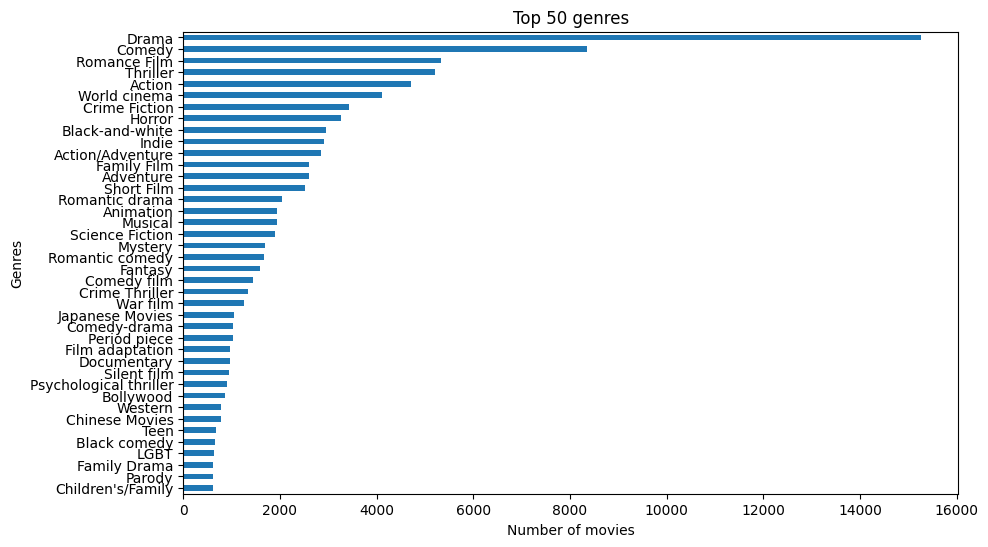

In [13]:
columns_needed= ['Plot', 'Genres', 'merge_year', 'nrclex_emotions', 'roberta_emotions', 'distilbert_emotions']

# we take only the films were the plot is not missing
df_tone= df.dropna(subset=['Plot'])[columns_needed]

df_tone['Genres'] = df_tone['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

genre_count = df_tone['Genres'].explode().value_counts()

# plot the genre distribution first 50 genres on an orizontal bar plot
plt.figure(figsize=(10, 6))
genre_count[:40].sort_values().plot(kind='barh')
plt.title('Top 50 genres')
plt.xlabel('Number of movies')
plt.ylabel('Genres')
plt.show()


#### To choose the relevant genres, we see that there is quite a natural cluster for genres that belong to more than 2000 Movies. To make analysis that have significant results, we choose only those genres that have more than 2000 movies.

In [14]:
relevant_genres = genre_count[genre_count>2000].index

df_ex_gen = df_tone.explode('Genres')
df_ex_relgen = df_ex_gen[df_ex_gen['Genres'].isin(relevant_genres)].reset_index(drop=True)

df_ex_relgen

,Plot,Genres,merge_year,nrclex_emotions,roberta_emotions,distilbert_emotions
0,"Set in the second half of the 22nd century, th...",Thriller,2001.0,"{'fear': 0.16296296296296298, 'anger': 0.13333...","{'neutral': 0.8483592867851257, 'realization':...","{'disgust': 0.5021221041679382, 'fear': 0.3510..."
1,"Set in the second half of the 22nd century, th...",Horror,2001.0,"{'fear': 0.16296296296296298, 'anger': 0.13333...","{'neutral': 0.8483592867851257, 'realization':...","{'disgust': 0.5021221041679382, 'fear': 0.3510..."
2,"Set in the second half of the 22nd century, th...",Adventure,2001.0,"{'fear': 0.16296296296296298, 'anger': 0.13333...","{'neutral': 0.8483592867851257, 'realization':...","{'disgust': 0.5021221041679382, 'fear': 0.3510..."
3,"Set in the second half of the 22nd century, th...",Action,2001.0,"{'fear': 0.16296296296296298, 'anger': 0.13333...","{'neutral': 0.8483592867851257, 'realization':...","{'disgust': 0.5021221041679382, 'fear': 0.3510..."
4,A series of murders of rich young women throug...,Thriller,1987.0,"{'fear': 0.1751412429378531, 'anger': 0.135593...","{'neutral': 0.925209254026413, 'approval': 0.0...","{'anger': 0.5024036765098572, 'disgust': 0.324..."
...,...,...,...,...,...,...
68183,Two former National Oceanic Atmospheric Admini...,Drama,2011.0,"{'fear': 0.175, 'anger': 0.0, 'anticip': 0.0, ...","{'neutral': 0.8082258701324463, 'confusion': 0...","{'neutral': 0.3741094172000885, 'disgust': 0.2..."
68184,{{No plot}} This film follows 12 years in the ...,Drama,2011.0,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...","{'neutral': 0.71477210521698, 'approval': 0.22...","{'neutral': 0.3897674083709717, 'joy': 0.38625..."
68185,"The story takes place in the year 2092,The Sup...",Adventure,1992.0,"{'fear': 0.14583333333333334, 'anger': 0.10416...","{'neutral': 0.8445000052452087, 'approval': 0....","{'neutral': 0.7576215267181396, 'surprise': 0...."
68186,"The story takes place in the year 2092,The Sup...",Short Film,1992.0,"{'fear': 0.14583333333333334, 'anger': 0.10416...","{'neutral': 0.8445000052452087, 'approval': 0....","{'neutral': 0.7576215267181396, 'surprise': 0...."


In [15]:
temp = pd.DataFrame(list(df_ex_relgen['distilbert_emotions'].apply(conv_to_dict))).reset_index(drop=True)


emotions_df = pd.concat([df_ex_relgen, temp], axis=1)
#emotions_df.to_csv('../../data/emotions_timeseries.csv', index=False) DATASET USED IN Q2 

emotions = ['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy'] 

temp = emotions_df.groupby('Genres').agg({
    emotion: ['mean'] for emotion in emotions
}).reset_index()
temp['count'] = emotions_df['Genres'].value_counts().sort_index().values


temp.columns = ['Genres'] + emotions + ['count']
final_df = temp.set_index('Genres')
final_df


,disgust,fear,anger,neutral,sadness,surprise,joy,count
Genres,,,,,,,,
Action,0.164581,0.157858,0.294362,0.207060,0.109015,0.039658,0.027467,4719
Action/Adventure,0.168214,0.164287,0.300741,0.202336,0.107800,0.036135,0.020486,2841
Adventure,0.146760,0.169830,0.226376,0.252786,0.124248,0.048896,0.031105,2608
Black-and-white,0.188865,0.140518,0.211064,0.209114,0.169323,0.041535,0.039581,2958
Comedy,0.159404,0.117332,0.193337,0.261184,0.155883,0.056790,0.056070,8348
Crime Fiction,0.197055,0.170661,0.277801,0.172240,0.124140,0.035676,0.022427,3436
Drama,0.179407,0.137836,0.197994,0.191499,0.206486,0.040810,0.045969,15267
Family Film,0.128007,0.134138,0.191569,0.278214,0.147508,0.063800,0.056763,2608
Horror,0.266120,0.301075,0.162985,0.140338,0.074354,0.044445,0.010683,3266


#### We show the score in tone for each genre in comparison with the average score weighted by the number of movies in each genre.

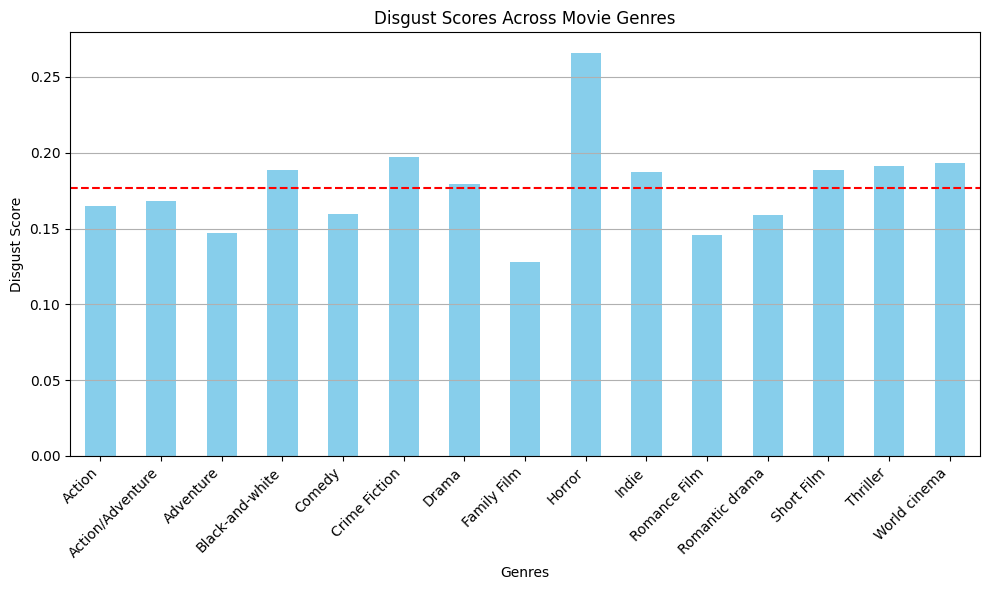

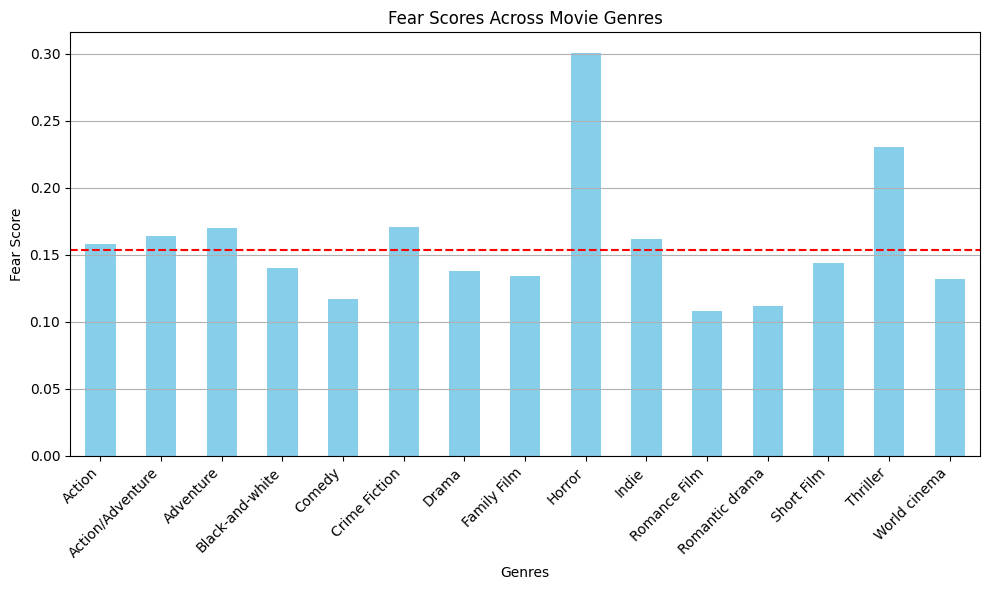

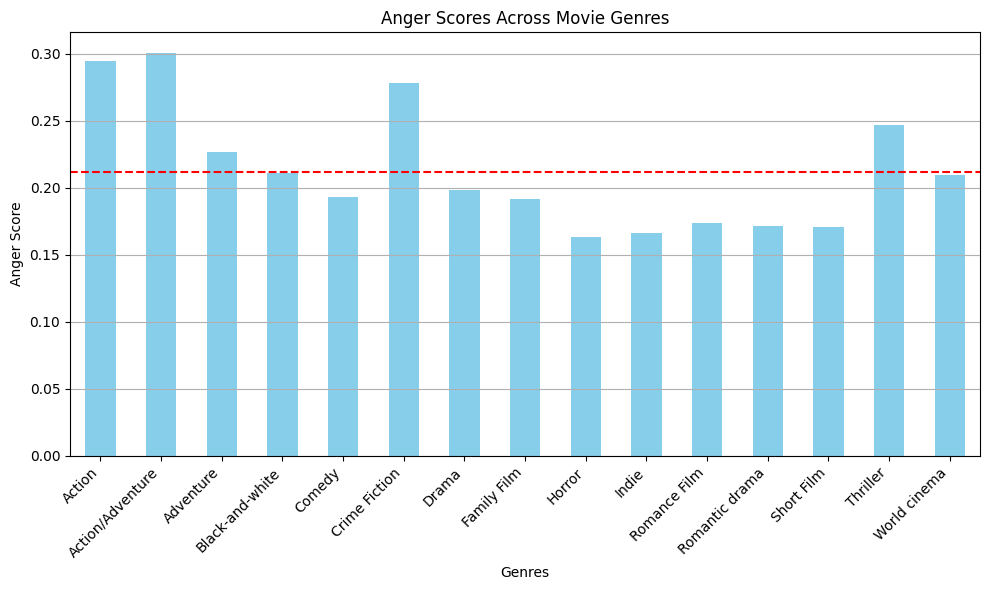

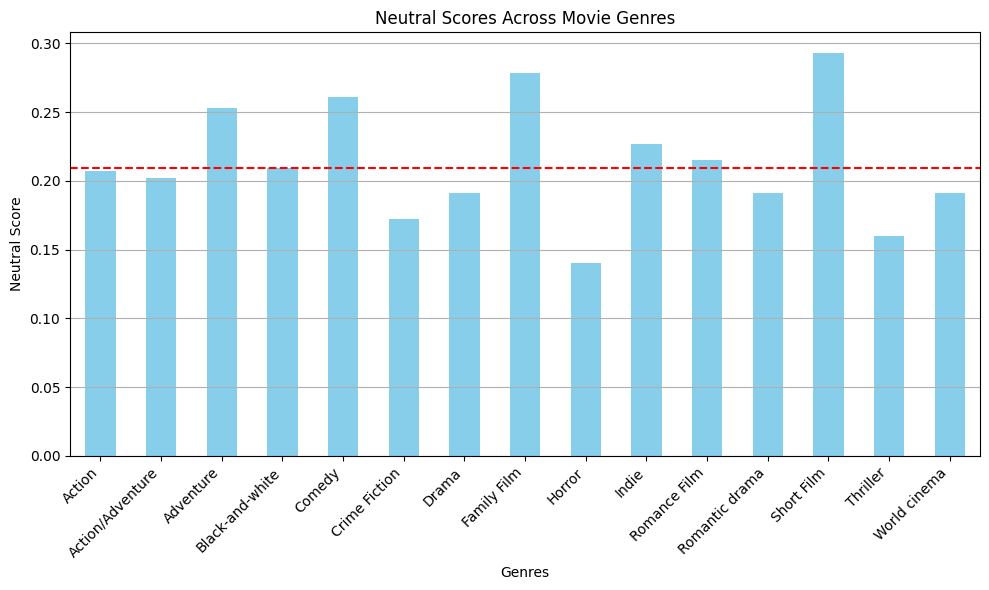

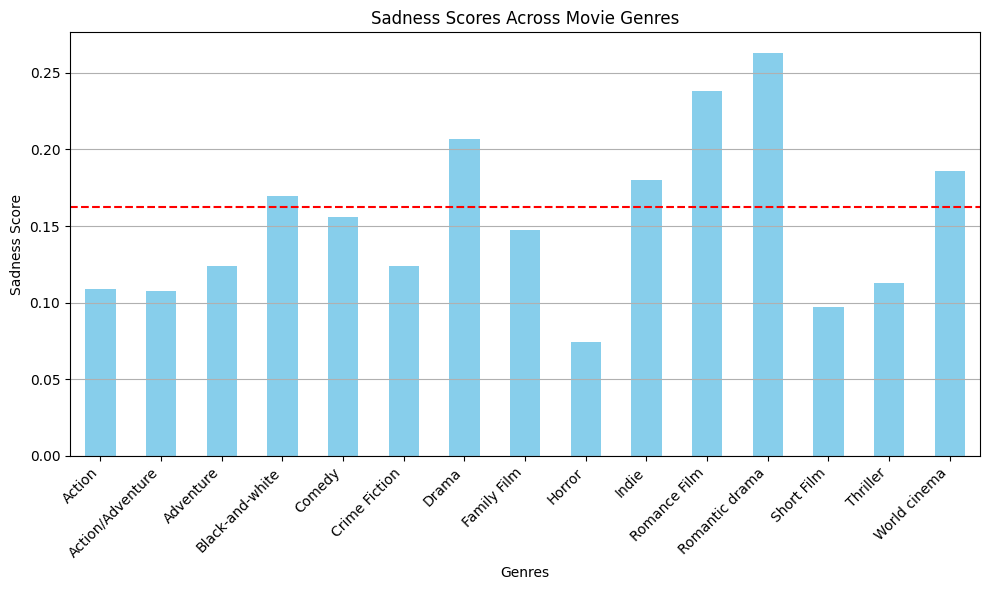

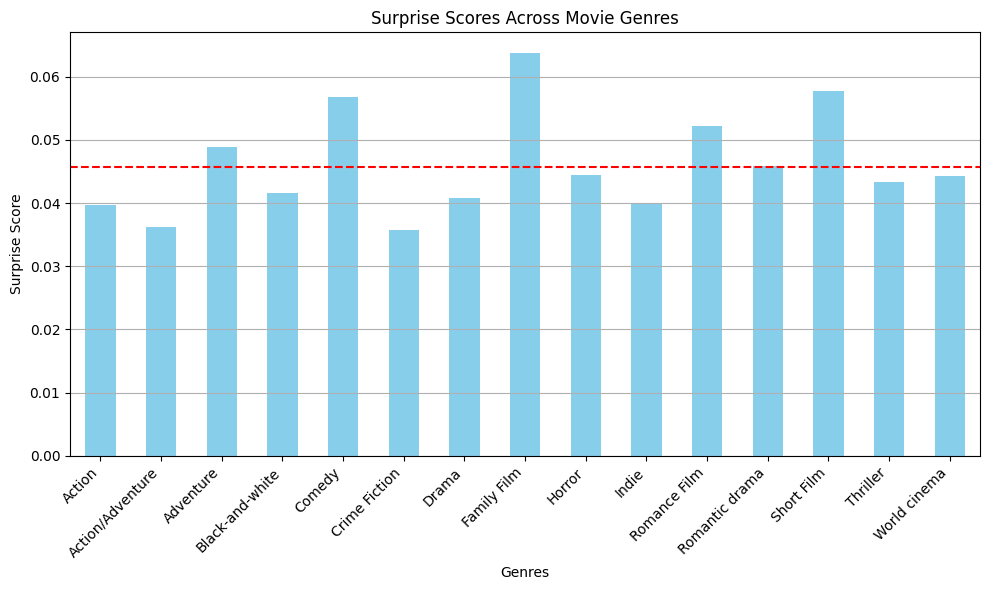

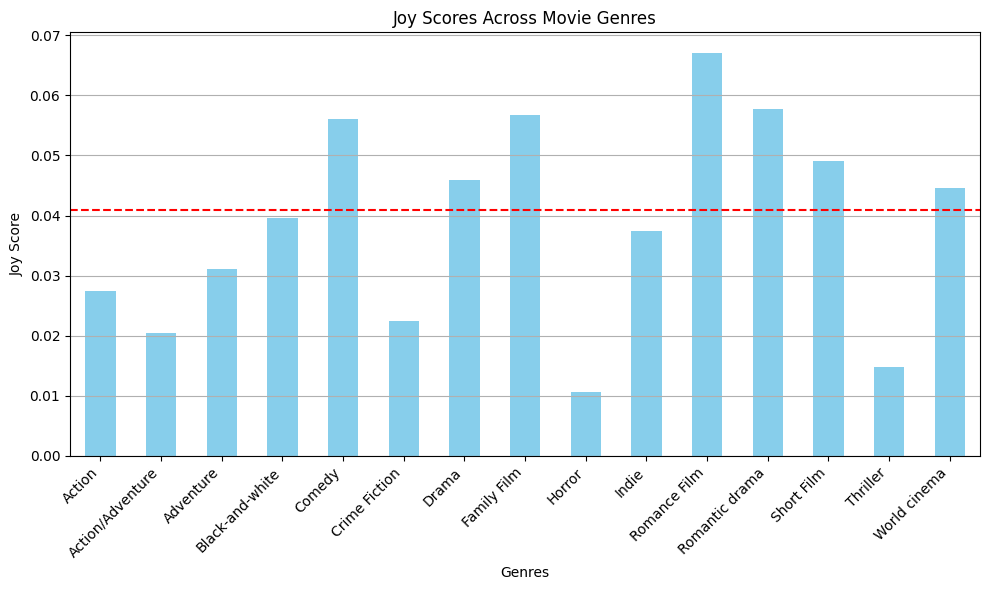

In [16]:
sum_movies = final_df['count'].sum()
weight_avg = final_df[emotions].mul(final_df['count'], axis=0).sum() / sum_movies

for emotion in emotions:
    #save each of those plots in this directory "../../data/Q1_plots"
    plt.figure(figsize=(10, 6))
    final_df[emotion].plot(kind = 'bar', title = f"{emotion.capitalize()} Scores Across Movie Genres", color = 'skyblue') 
    plt.axhline(y = weight_avg[emotion], color = 'r', linestyle = '--', label = 'Average Score')
    plt.xlabel('Genres')
    plt.ylabel(f"{emotion.capitalize()} Score")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f"../../data/Q1_plots/avg/{emotion}_scores.png")
    plt.show()

#### We want to understand the predominant tones for each genre, to avoid the bias from the model predictions, we take the emotion that have a statistically significant difference from the average tone by genre using a t-test.

###############################################################
 Statistically significant emotions for Action: anger


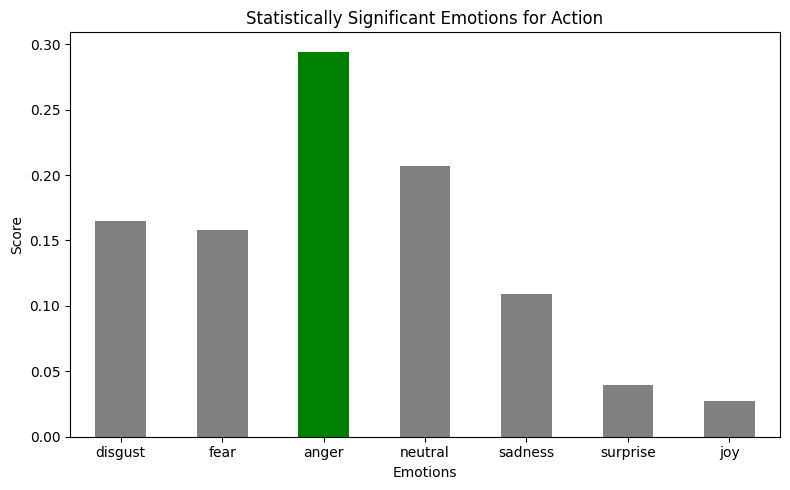

###############################################################
 Statistically significant emotions for Action/Adventure: anger


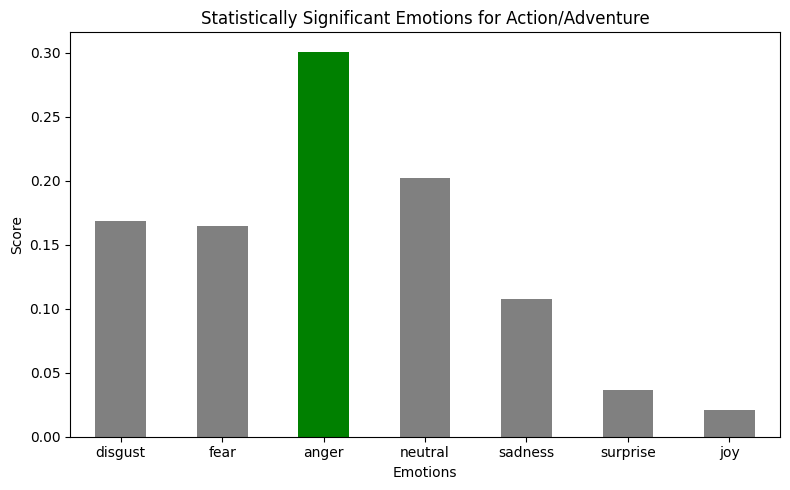

###############################################################
 Statistically significant emotions for Adventure: neutral


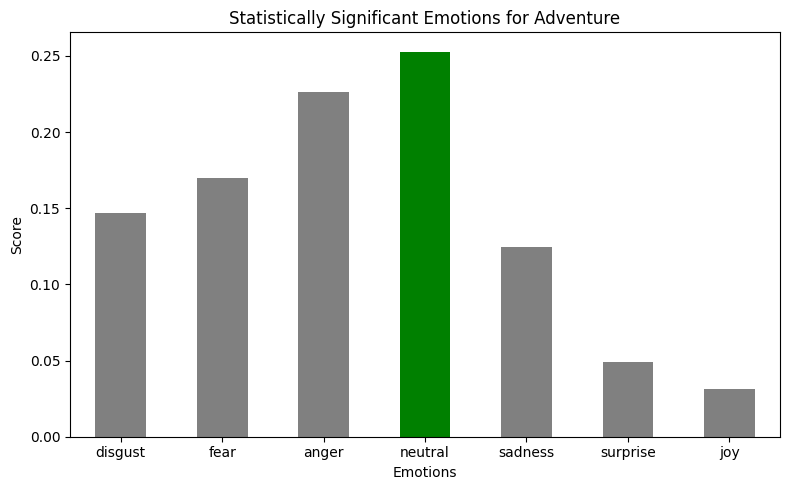

###############################################################
 Statistically significant emotions for Black-and-white: 


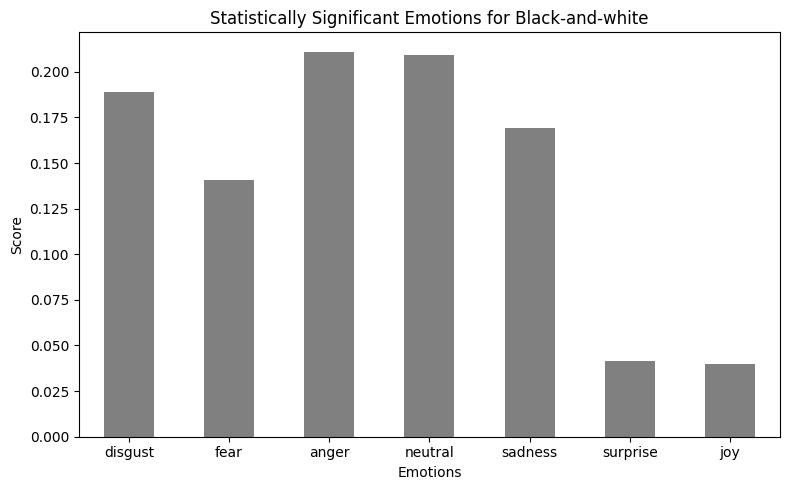

###############################################################
 Statistically significant emotions for Comedy: neutral, surprise, joy


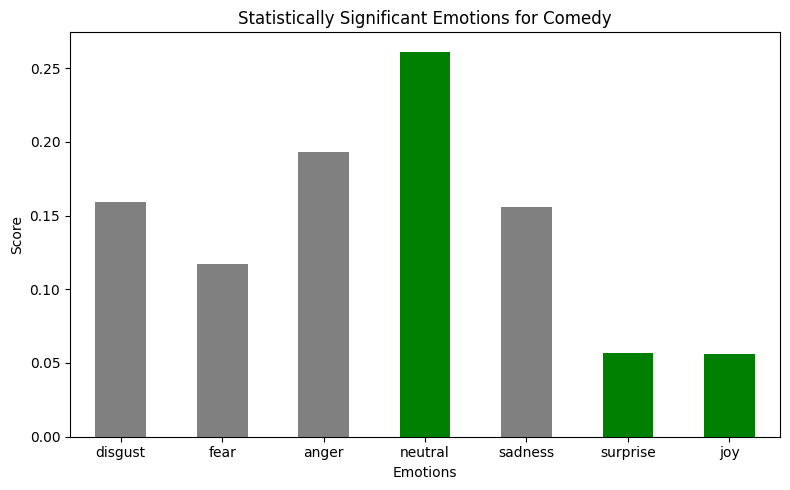

###############################################################
 Statistically significant emotions for Crime Fiction: disgust, anger


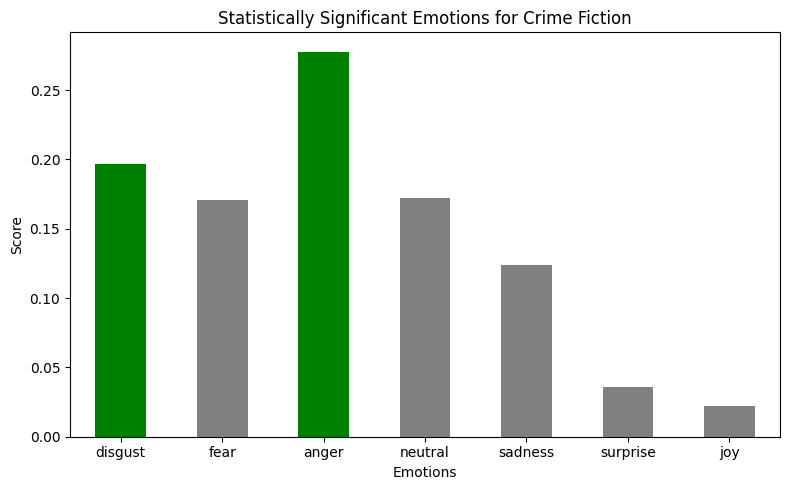

###############################################################
 Statistically significant emotions for Drama: sadness


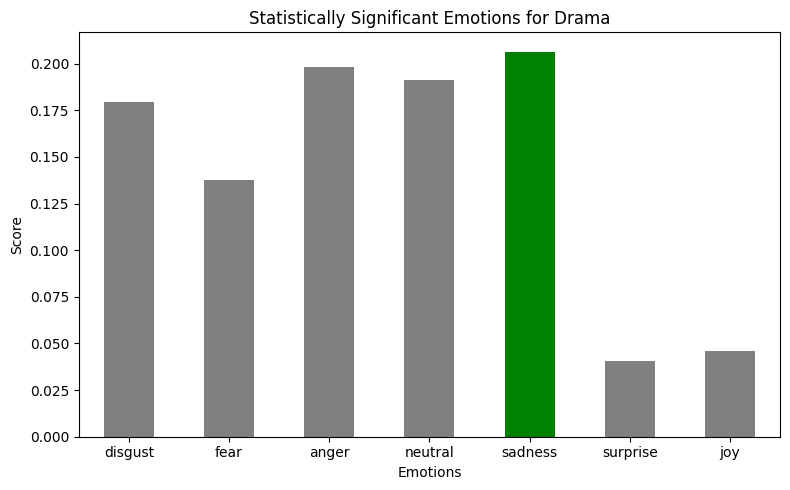

###############################################################
 Statistically significant emotions for Family Film: neutral, surprise, joy


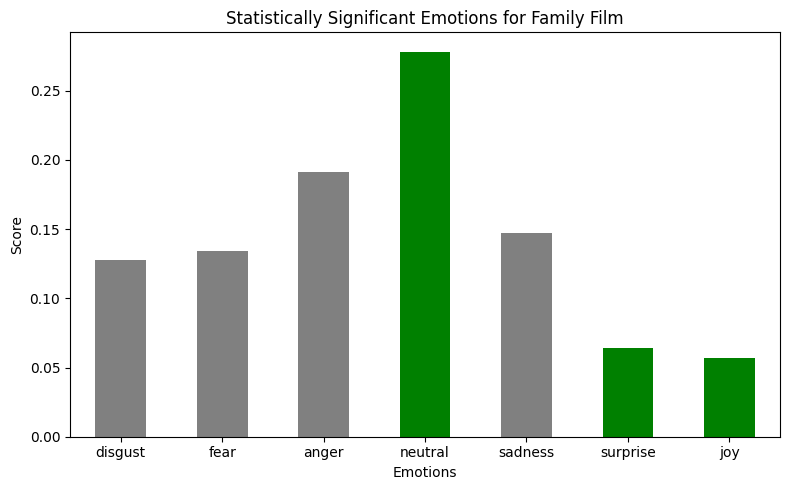

###############################################################
 Statistically significant emotions for Horror: disgust, fear


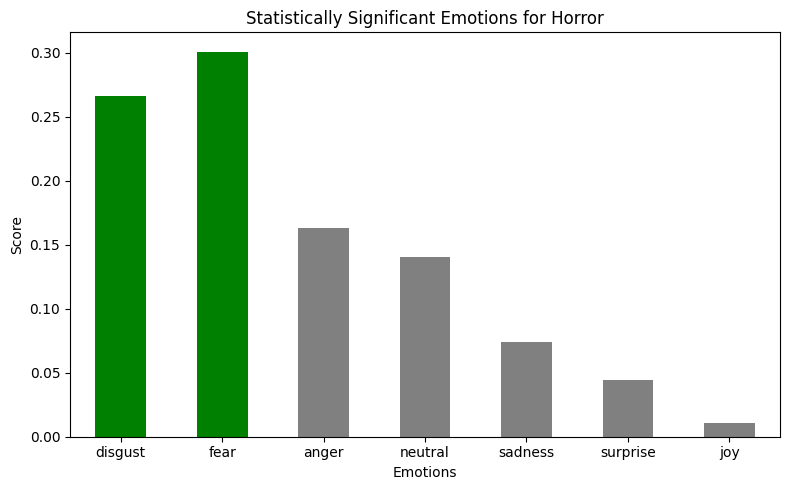

###############################################################
 Statistically significant emotions for Indie: sadness


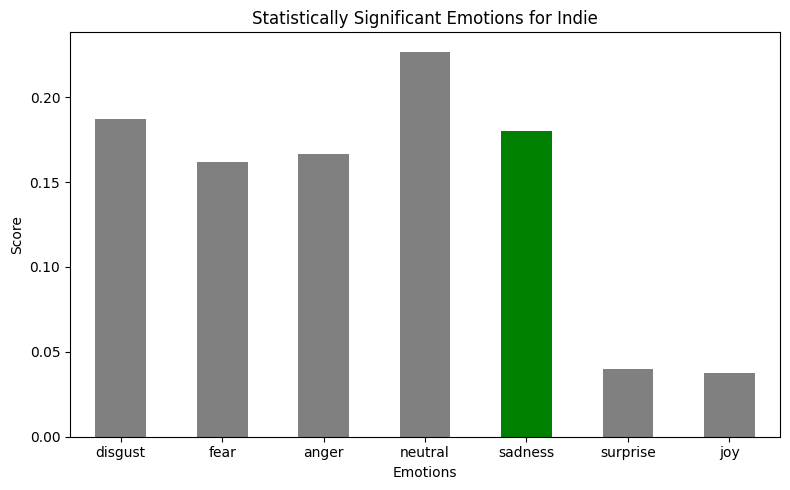

###############################################################
 Statistically significant emotions for Romance Film: sadness, surprise, joy


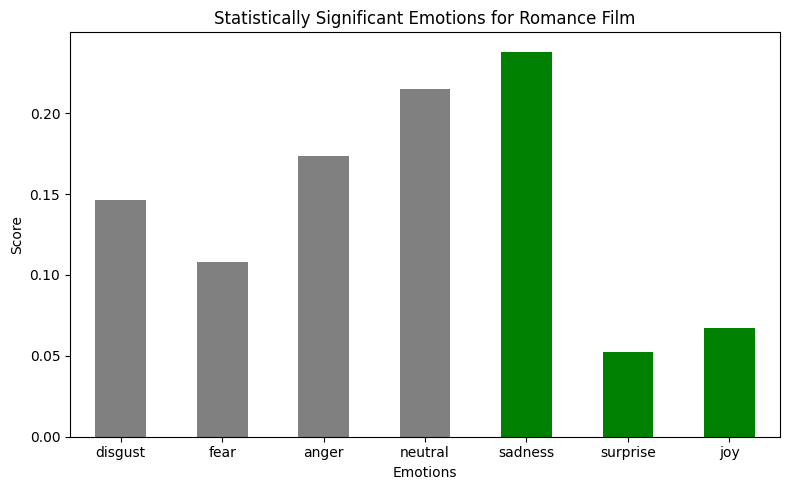

###############################################################
 Statistically significant emotions for Romantic drama: sadness, joy


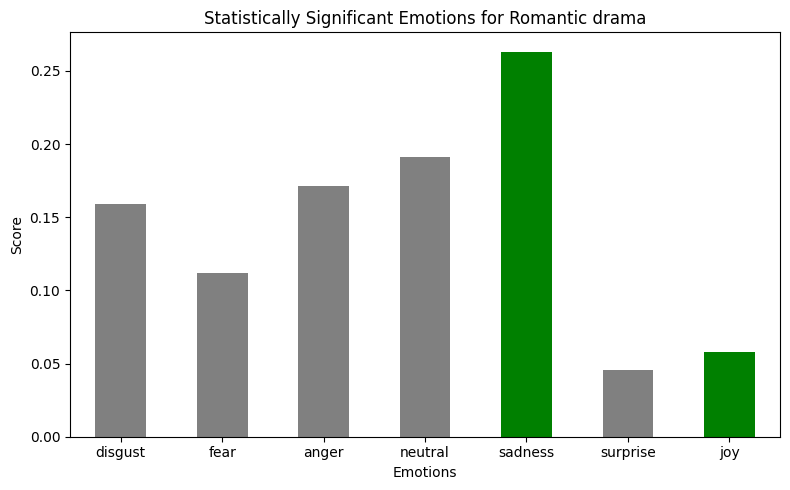

###############################################################
 Statistically significant emotions for Short Film: neutral, surprise, joy


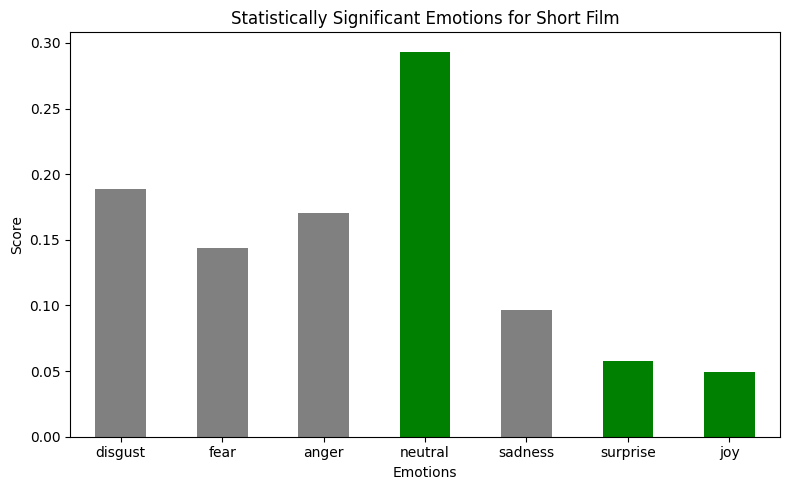

###############################################################
 Statistically significant emotions for Thriller: fear, anger


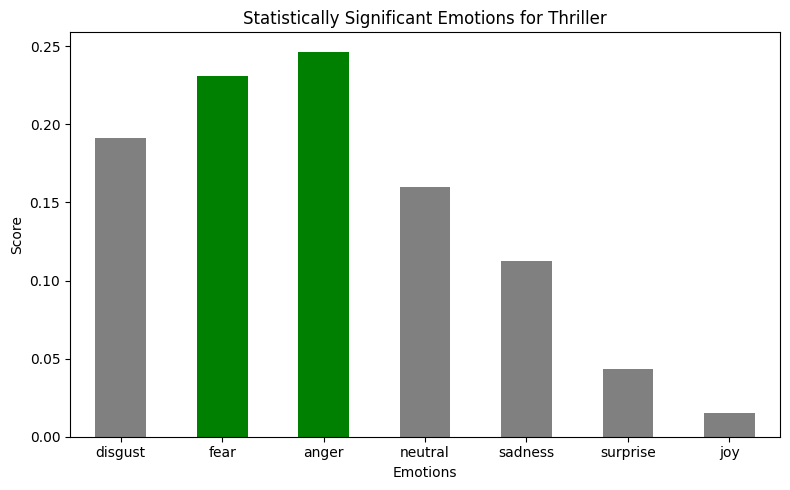

###############################################################
 Statistically significant emotions for World cinema: disgust, sadness


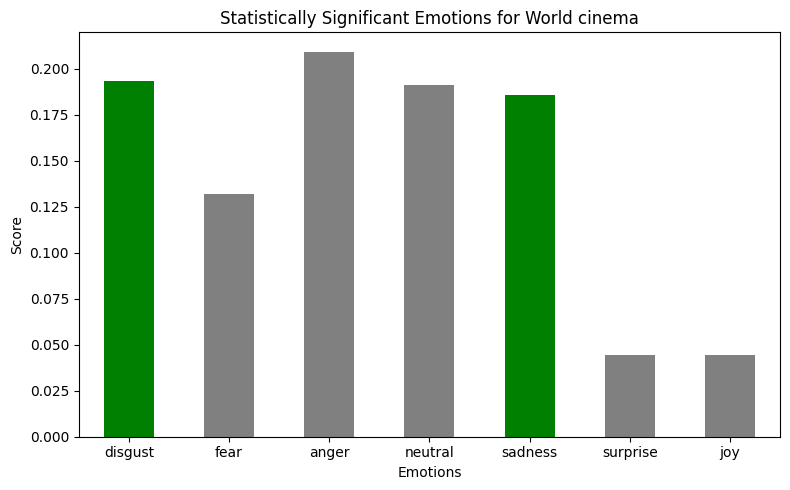

In [17]:
from scipy.stats import ttest_1samp

stat_significant_emotions = {}

for genre in final_df.index:
    genre_emotions = final_df.loc[genre, emotions]
    significant_emotions = []
    
    for emotion in emotions:
        # Perform a one-sample t-test
        stat, p_value = ttest_1samp(final_df[emotion], genre_emotions[emotion])
        
        if p_value / 2 < 0.05 and genre_emotions[emotion] > weight_avg[emotion]:
            significant_emotions.append(emotion)
    
    stat_significant_emotions[genre] = significant_emotions

for genre in stat_significant_emotions.keys():
    genre_emotions = final_df.loc[genre, emotions]
    significant_emotions = stat_significant_emotions[genre]
    
    print("###############################################################\n",
          f"Statistically significant emotions for {genre}: {', '.join(significant_emotions)}")
    plt.figure(figsize=(8, 5))
    genre_emotions.plot(kind='bar', color=['green' if emotion in significant_emotions else 'gray' for emotion in emotions])
    plt.title(f"Statistically Significant Emotions for {genre}")
    plt.xlabel("Emotions")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.tight_layout()
    if genre == 'Action/Adventure':
        genre = 'Action_Adventure'
    plt.savefig(f"../../data/Q1_plots/sign/{genre}_significant_emotions.png")
    plt.show()
    


**ANSWER:**
#### After analyzing the data, here are the results for each genre:

- **Action**: The predominant tones is **anger**, that makes sense, and will we go deeper in trying to understand how the anger emotion changed over time in the time series analysis.

- **Action/Adventure**: The predominant tones is **anger**, since the genre is very similar to action, will we only keep the action genre in the time series analysis. 

- **Adventure**: The predominant tones is **neutral**, al little surprising, but we do not think is interesting to analyse the evolution of a neutral emotion over time. Furthermore, Adveture is still very similar to Action, so we will not keep it in the time series analysis.

- **Black-and-White**: The is no predominant tone, that make sense, since it does not represent a genre, but a characteristic of the movie. We will not keep it in the time series analysis.

- **Comedy**: The predominant tones are **neutral**, **surprise** and **joy**, that makes sense, we are not interested in the neutral emotion, but we will keep the surprise and joy emotions in the time series analysis.

- **Crime Fiction**: The predominant tones are **disgust** and **anger**, wi will keep both in the time series analysis.

- **Drama**: The predominant tones is **sadness**, make sense, we will keep the sadness emotion in the time series analysis.

- **Family Film**: The predominant tones are **neutral**, **surprise** and **joy**, that makes sense, we are not interested in the neutral emotion, but we will keep the surprise and joy emotions in the time series analysis.

- **Horror**: The predominant tones are **fear** and **disgust**, we will keep both in the time series analysis.

- **Indie**: The predominant tones is **sadness**, make sense, we will keep the sadness emotion in the time series analysis.

- **Romance Film**: The predominant tones are **sadness**, **joy** and **surprise**, we keep only 2 predominant emotions, sadness and joy, in the time series analysis.

- **Romantic Drama**: The predominant tones are **sadness** and **joy**, since this genre is very similar to Romance Film, we will not keep it in the time series analysis.

- **Short Film**: The predominant tones are **neutral**, **surprise** and **joy**, we do not think this genre is worth analyze, like 'Black-and-White', it does not represent a genre, but a characteristic of the movie. We will not keep it in the time series analysis.

- **Thriller**: The predominant tones are **fear** and **anger**, we will keep both in the time series analysis.

- **World cinema**: This genre represent film made outside American motion picture industry, particularly those in opposition to the aesthetic and values of the Hollywood mainstream, so we keep it to have an understanding of what is the overall emotion outside the mainstream Hollywood movies. The predominant tones are **sadness** and **disgust**, we will keep both in the time series analysis.